In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_C_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,NaN,NaN,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,NaN,13.21,3.69,1.29,72.61,0.57,8.22,NaN,NaN
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,NaN,2.02,73.42,0.00,8.44,1.64,0.0
212,NaN,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	15
float64		column 2	8
float64		column 3	11
float64		column 4	7
float64		column 5	13
float64		column 6	12
float64		column 7	13
float64		column 8	6
float64		column 9	11


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,199.000000,206.000000,203.000000,207.000000,201.000000,202.000000,201.000000,208.000000,203.000000
mean,1.518399,13.415874,2.690296,1.445314,72.659005,0.511634,8.979254,0.180096,0.057094
std,0.003060,0.805247,1.432874,0.504753,0.783299,0.665419,1.447459,0.503467,0.097351
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516540,12.930000,2.140000,1.190000,72.280000,0.142500,8.270000,0.000000,0.000000
50%,1.517690,13.305000,3.480000,1.360000,72.790000,0.560000,8.610000,0.000000,0.000000
75%,1.519300,13.825000,3.595000,1.630000,73.100000,0.610000,9.230000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

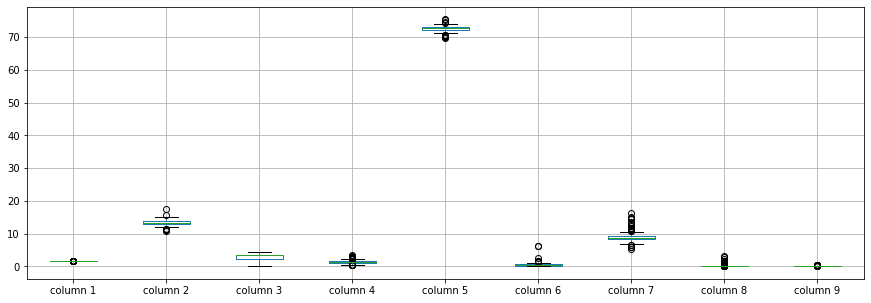

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518399
column 2    13.415874
column 3     2.690296
column 4     1.445314
column 5    72.659005
column 6     0.511634
column 7     8.979254
column 8     0.180096
column 9     0.057094
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.166470,-0.034517,-0.403232,-0.571588,-0.307956,0.815192,0.005615,0.133673
column 2,-0.166470,1.000000,-0.344041,0.115040,-0.047127,-0.331497,-0.237892,0.324031,-0.249689
column 3,-0.034517,-0.344041,1.000000,-0.477284,-0.180323,-0.029507,-0.437746,-0.489606,0.134561
column 4,-0.403232,0.115040,-0.477284,1.000000,-0.008440,0.362929,-0.236703,0.494924,-0.094335
column 5,-0.571588,-0.047127,-0.180323,-0.008440,1.000000,-0.192798,-0.263186,-0.095270,-0.115824
column 6,-0.307956,-0.331497,-0.029507,0.362929,-0.192798,1.000000,-0.328779,-0.024987,-0.016097
column 7,0.815192,-0.237892,-0.437746,-0.236703,-0.263186,-0.328779,1.000000,-0.114735,0.089451
column 8,0.005615,0.324031,-0.489606,0.494924,-0.095270,-0.024987,-0.114735,1.000000,-0.056279
column 9,0.133673,-0.249689,0.134561,-0.094335,-0.115824,-0.016097,0.089451,-0.056279,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+30,9+30+30,9+30+30+30,9+30+30+30+30,9+30+30+30+30+30,9+30+30+30+30+30+30,9+30+30+30+30+30,9+30+30+30+30,9+30+30+30,9+30+30,9+30,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=70)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 96.64205463115985
Epoch: 1 , loss: 96.6097183227539
Epoch: 2 , loss: 96.85807037353516
Epoch: 3 , loss: 96.59093240591196
Epoch: 4 , loss: 97.52688833383414
Epoch: 5 , loss: 96.49486072246845
Epoch: 6 , loss: 97.16024428147536
Epoch: 7 , loss: 96.43582035945012
Epoch: 8 , loss: 96.8196023794321
Epoch: 9 , loss: 96.52279428335336
Epoch: 10 , loss: 96.80499737079327
Epoch: 11 , loss: 96.41752272385817
Epoch: 12 , loss: 96.48003094012921
Epoch: 13 , loss: 96.40552520751953
Epoch: 14 , loss: 96.75050940880409
Epoch: 15 , loss: 96.43841435359074
Epoch: 16 , loss: 96.47676849365234
Epoch: 17 , loss: 96.75483116736778
Epoch: 18 , loss: 96.45022935133714
Epoch: 19 , loss: 96.4665533212515
Epoch: 20 , loss: 96.83221846360426
Epoch: 21 , loss: 96.53648669903095
Epoch: 22 , loss: 96.8380355834961
Epoch: 23 , loss: 96.39369553786058
Epoch: 24 , loss: 96.46223801832933
Epoch: 25 , loss: 96.76418832632211
Epoch: 26 ,

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.000000,0.0,0.0,-0.028942,1.984647,0.000000,0.000000
2,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,0.055502,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.203904,0.052865
4,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
209,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
210,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
211,0.000000,0.0,1.405636,0.0,0.0,0.000000,0.000000,0.000000,0.000000
212,-0.730283,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(166.41228099090725, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.15261077569028303

In [18]:
new_df.iloc[66,:]

column 1     1.521520
column 2    13.050000
column 3     2.115539
column 4     0.870000
column 5    72.220000
column 6     0.190000
column 7     9.850000
column 8     0.000000
column 9     0.170000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.521010,13.64,4.490000,1.10,71.78,0.060000,8.750000,0.000000,0.000000
1,1.517610,13.89,3.600000,1.36,72.73,0.451058,9.814647,0.000000,0.000000
2,1.516180,13.53,3.550000,1.54,72.99,0.390000,7.780000,0.000000,0.000000
3,1.573162,13.21,3.690000,1.29,72.61,0.570000,8.220000,0.203904,0.052865
4,1.517420,13.27,3.620000,1.24,73.08,0.550000,8.070000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
209,1.516230,14.14,0.000000,2.88,72.61,0.080000,9.180000,1.060000,0.000000
210,1.516850,14.92,0.000000,1.99,73.06,0.000000,8.400000,1.590000,0.000000
211,1.520650,14.36,1.405636,2.02,73.42,0.000000,8.440000,1.640000,0.000000
212,0.786227,14.38,0.000000,1.94,73.61,0.000000,8.480000,1.570000,0.000000


In [20]:
imputations[-1].to_excel("Glass_C_5(imp).xlsx", index=False, header=False)